<a href="https://colab.research.google.com/github/NeerajMehta15/NLP_Repository/blob/main/4_NLP_Hugginface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import string
from transformers import pipeline
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import semantic_search
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
runway = pd.read_csv('/content/drive/MyDrive/Datasets/runway.csv', parse_dates = ['review_date'])

In [ ]:
runway.head()

,user_id,item_id,rating,rented for,review_text,category,height,size,age,review_date
0,476109,139086,8,formal affair,it hit the floor perfectly with a pair of heel...,gown,"5' 3""",15,27.0,2017-12-19
1,203660,1126889,6,party,the dress is absolutely gorgeous unfortunately...,dress,"5' 4""",12,28.0,2022-01-03
2,868581,652189,8,wedding,even though it was lined with satin this was a...,dress,"5' 5""",24,30.0,2021-08-05
3,935076,1879504,8,wedding,this dress was greatit fit really well and was...,sheath,"5' 3""",14,37.0,2021-10-02
4,995023,1179146,10,party,super flattering i am usually a sizemi have a ...,dress,"5' 2""",14,37.0,2022-11-20


In [ ]:
runway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      1506 non-null   int64         
 1   item_id      1506 non-null   int64         
 2   rating       1506 non-null   int64         
 3   rented for   1506 non-null   object        
 4   review_text  1506 non-null   object        
 5   category     1506 non-null   object        
 6   height       1503 non-null   object        
 7   size         1506 non-null   int64         
 8   age          1500 non-null   float64       
 9   review_date  1506 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 117.8+ KB


**2. Preprocessing**

In [ ]:
#Cleaning the texts
runway['clearned_text'] = runway['review_text']
runway['clearned_text'] = runway['review_text'].str.replace(r"\/", "")
runway['clearned_text'] = runway['review_text'].str.translate(string.punctuation)
runway['clearned_text'] = runway['review_text'].str.replace(r"\d+", "")
runway['clearned_text'] = runway['review_text'].str.replace(r"\s{2,}+", "")
runway['clearned_text'] = runway['review_text'].str.lower()

In [ ]:
#Let's do the sentiment analysis
model = "distilbert-base-uncased-finetuned-sst-2-english"
sentimentAnalysis = pipeline("sentiment-analysis", model=model)
sent_analysis_output = sentimentAnalysis(list(runway['clearned_text']))

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


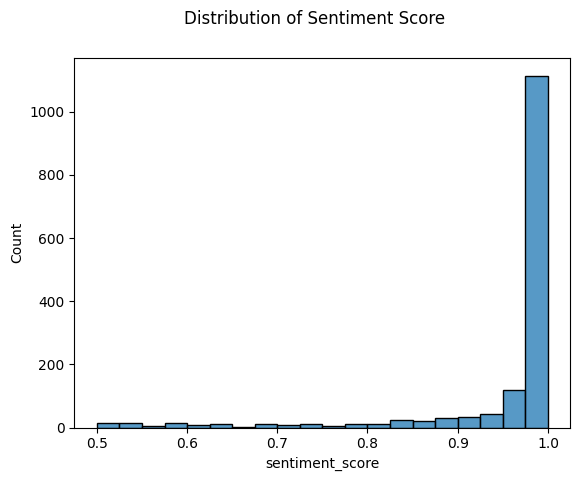

In [ ]:
runway['sentiment_label'] = [s['label'] for s in sent_analysis_output]
runway['sentiment_score'] = [s['score'] for s in sent_analysis_output]
sns.histplot(data=runway, x = "sentiment_score", bins=20)
plt.suptitle("Distribution of Sentiment Score")
plt.show()

In [ ]:
#Sentiment changes over the years
runway['year'] = runway['review_date'].dt.year
chart_data = runway.groupby(['year','sentiment_score'],as_index=False)['user_id'].count()

In [ ]:
chart_data.head()

,year,sentiment_score,user_id
0,2016,0.988270,1
1,2016,0.994780,1
2,2016,0.998868,1
3,2017,0.537381,1
4,2017,0.831113,1


Text(0, 0.5, 'Count of Reviews')

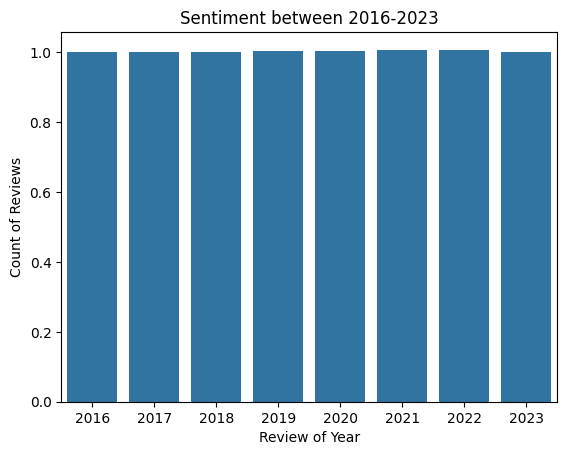

In [ ]:
sns.barplot(data=chart_data, x="year", y = 'cnt',errorbar=None)
plt.title("Sentiment between 2016-2023")
plt.xlabel ("Review of Year")
plt.ylabel("Count of Reviews")